In [26]:
%matplotlib notebook

In [46]:
# Dependencies
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import requests
from census import Census
from us import states
from sklearn.linear_model import LinearRegression

In [29]:
# Census API Key (from Kate's notebook)
from config import api_key
c = Census(api_key, year=2017)

# Import broadband_stats in order to get list of blockgroup
broadband_csv = "Resources/mn_broadband_stats.csv"
broadband_df = pd.read_csv(broadband_csv)


In [30]:
#load census blocks and school attendance areas. 
census = "Resources/society_redistricting_2010.gpkg"
#Note: these spatial dataframes are not in Github due to their size. They have been saved in Google drive due to file size.
school_areas = "Resources/bdry_school_attendance_areas.gpkg"

#create database for census information
census_block_df = gpd.read_file(census)
#create database for school information
school_area_df = gpd.read_file(school_areas)

In [32]:
#pull in the point location of each school
school_locs = "Resources/struc_school_program_locs.gpkg"
#create geospatial database for point school locations
school_org_id = gpd.read_file(school_locs)



In [33]:
#Assign spatial reference datum for census block and school spatial dataframes
census_block_df = census_block_df.to_crs({'init': 'epsg:26915'})
school_area_df = school_area_df.to_crs({'init': 'epsg:26915'})
#Intersect the school district and census spatial data frames
census_school_intersect = gpd.sjoin(census_block_df, school_area_df, how="inner", op='intersects')



In [45]:
#Assign spatial reference datum for census block and school spatial dataframes
school_org_id = school_org_id.to_crs({'init': 'epsg:26915'})
school_area_df = school_area_df.to_crs({'init': 'epsg:26915'})

#Intersect the individual school and census spatial data frames
school_ORGID_intersect = gpd.sjoin(school_area_df, school_org_id,  how="inner", op='intersects')


In [34]:
#Subsetting useful columns to reduce file size
school_ORGID_polygon=school_ORGID_intersect[['UNI_TYP_right','UNI_MAJ_right', 'UNI_IMD', 'ORGID','ORGID_NUM', 'geometry']]
census_block_df_subset=census_block_df[['BLOCK','TRACT', 'geometry']]

In [35]:
#Spatial join of individual schools with school graduation rates
school_intersect = gpd.sjoin(census_block_df_subset, school_ORGID_polygon, how="inner", op='intersects')

In [36]:
#Subset intersect to reduce file size
school_ORGID_polygon=school_ORGID_intersect[['UNI_TYP_right','UNI_MAJ_right', 'UNI_IMD', 'ORGID','ORGID_NUM', 'geometry']]

In [37]:
#Create a subset of the intersected spatial dataframe 
census_subset=census_school_intersect[['STATE', 'BLOCKGROUP', 'BLOCK', 'TRACT', 'MCD', 'SUBMCD', 'PLACE', 'UNI_MAJ', 'UNI_TYP', 'UNI_NAM', 'HIGH_NAME', 'MIDD_NAME', 'ELEM_NAME', 'POPULATION', 'geometry']]

In [38]:
#Create csv of census merged with schools
census_subset.to_csv('Resources/census_subset.csv')

In [44]:
#Create csv of school locations
school_org_id.to_csv('Resources/school_locations_df.csv')

In [ ]:
#load the graduation rate csv that has ORGID created for each secondary school
clean_grad = "Resources/CleanedGradFile2018.csv"
grad_rates = pd.read_csv(clean_grad)

grad_rates['ORGID'] = grad_rates['ORGID'].map(lambda x: f'{x:0>12}')

In [15]:
#merge school intersect with graduation rates
school_ORGID_merged = pd.merge(school_intersect, grad_rates,  how="inner", on="ORGID")

In [14]:
#This section creates a file that is too large to deal with
district_grad_rate  = pd.merge(school_ORGID_merged, census_subset,   how="inner", on="UNI_MAJ")
district_grad_rate
district_grad_rate.to_csv('Resources/district_grad_rate.csv')

,UNI_TYP_x,UNI_MAJ,UNI_IMD,ORGID,ORGID_NUM,SCHNAME,ADDRESS,CITY,ZIP,SCH_TYPE,...,MCD,SUBMCD,PLACE,UNI_TYP_y,UNI_NAM,HIGH_NAME,MIDD_NAME,ELEM_NAME,POPULATION,geometry_y
0,01,0497,020,010497020000,1.049702e+10,Lyle High,700 E 2ND ST,LYLE,55953,PUBLIC,...,2709945322,None,None,01,Lyle,LYLE,None,LYLE,2,"POLYGON ((505693.1659788654 4817935.143235506,..."
1,01,0497,020,010497020000,1.049702e+10,Lyle High,700 E 2ND ST,LYLE,55953,PUBLIC,...,2709945322,None,None,01,Lyle,LYLE,None,LYLE,0,"POLYGON ((506740.4604834803 4817087.292188259,..."
2,01,0497,020,010497020000,1.049702e+10,Lyle High,700 E 2ND ST,LYLE,55953,PUBLIC,...,2709945322,None,None,01,Lyle,LYLE,None,LYLE,0,"POLYGON ((506770.627292286 4817072.218552936, ..."
3,01,0497,020,010497020000,1.049702e+10,Lyle High,700 E 2ND ST,LYLE,55953,PUBLIC,...,2709945322,None,None,01,Lyle,LYLE,None,LYLE,2,"POLYGON ((506489.6095132345 4817190.218686369,..."
4,01,0497,020,010497020000,1.049702e+10,Lyle High,700 E 2ND ST,LYLE,55953,PUBLIC,...,2709945322,None,None,01,Lyle,LYLE,None,LYLE,4,"POLYGON ((506354.1548631907 4817935.40204706, ..."
5,01,0497,020,010497020000,1.049702e+10,Lyle High,700 E 2ND ST,LYLE,55953,PUBLIC,...,2709945322,None,None,01,Lyle,LYLE,None,LYLE,0,"POLYGON ((507002.5738860791 4817121.98798402, ..."
6,01,0497,020,010497020000,1.049702e+10,Lyle High,700 E 2ND ST,LYLE,55953,PUBLIC,...,2709945322,None,None,01,Lyle,LYLE,None,LYLE,8,"POLYGON ((509816.257009927 4817140.275877957, ..."
7,01,0497,020,010497020000,1.049702e+10,Lyle High,700 E 2ND ST,LYLE,55953,PUBLIC,...,2709945322,None,None,01,Lyle,LYLE,None,LYLE,12,"POLYGON ((509185.2373246857 4817925.78975594, ..."
8,01,0497,020,010497020000,1.049702e+10,Lyle High,700 E 2ND ST,LYLE,55953,PUBLIC,...,2709945322,None,None,01,Lyle,LYLE,None,LYLE,0,"POLYGON ((508799.8161363067 4817898.509337439,..."
9,01,0497,020,010497020000,1.049702e+10,Lyle High,700 E 2ND ST,LYLE,55953,PUBLIC,...,2709945322,None,None,01,Lyle,LYLE,None,LYLE,4,"POLYGON ((510724.3450116344 4817959.3863053, 5..."


In [ ]:
#create an average graduation rate by census block
#district_grad_subset=district_grad_rate[['BLOCKGROUP','BLOCK', 'TRACT','Ending Status','Four Year Percent', 'Four Year Total', 'geometry_y','geometry_x']]
district_grouped = school_ORGID_merged.groupby('BLOCK')
district_grouped_mean = district_grouped.mean()
district_grouped_mean.to_csv('Resources/district_grouped_mean.csv')

#create average graduation rate by census tract
district_grouped = school_ORGID_merged.groupby('TRACT')
district_grouped_tract_mean = district_grouped.mean()



In [ ]:
#Creating a csv that contains the points of each school with the graduation rates
point_grad_rates = gpd.sjoin(school_ORGID_merged, census_subset, how="inner", op='within')
point_grad_rates.to_csv('Resources/point_grad_rates.csv')

In [ ]:
# Census API Key (this section of code was written by Kate)
from config import api_key
c = Census(api_key, year=2017)

# Import broadband_stats in order to get list of blockgroup
broadband_csv = "Resources/mn_broadband_stats.csv"
broadband_df = pd.read_csv(broadband_csv)
broadband_df.head()

# Get list of blockcodes (from Kate's notebook)
blockgroups = broadband_df['BlockCode']


counties = []

for code in blockgroups:
    counties.append((str(code))[2:5])
    
county_codes = sorted((set(counties)))


In [19]:
# Run loop on census api (this section of code was also developed by Kate)
median_income = []

for county in county_codes:
    median_income += c.acs5.state_county_tract('B19013_001E', states.MN.fips, county, Census.ALL)


    
# Convert to DataFrame
median_income = pd.DataFrame(median_income)
median_income.head()


# Column Renaming
median_income = median_income.rename(columns={"B19013_001E": "Median Income", "county":"County", "state":"State", "tract":"Tract"})




In [40]:
# Final DataFrame (This section of code was also written by Kate)
median_income = median_income[["Median Income", "State", "County", "Tract"]]
# create tract number to merge with graduation rate
median_income['TRACT'] = median_income['State'] + median_income['County'] + median_income['Tract']


In [41]:
#merging median income with census tract
median_income_tract = pd.merge(district_grouped_tract_mean, median_income, how="inner", on="TRACT")
#sort out negative income rows
median_income_tract = median_income_tract[median_income_tract['Median Income'] > 0] 


<IPython.core.display.Javascript object>


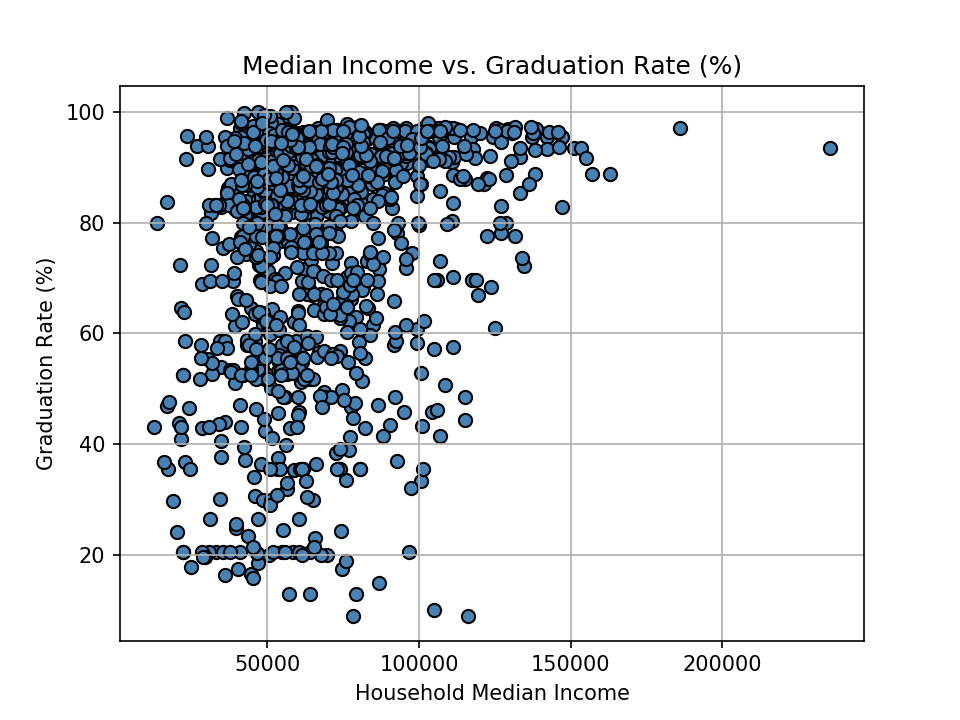

In [49]:
# Build a scatter plot 
plt.scatter(median_income_tract["Median Income"], median_income_tract["Four Year Percent"], marker="o", s=40, color="steelblue", edgecolors='black')

# Edit graph axis and titles
plt.title("Median Income vs. Graduation Rate (%)")

income_reg = np.array(median_income_tract["Median Income"]).reshape((-1, 1))
grad_reg = np.array(median_income_tract["Four Year Percent"]) #likely "Four Year Percent"#
model = LinearRegression().fit(income_reg, grad_reg)
r_sq = model.score(income_reg, grad_reg)

plt.ylabel("Graduation Rate (%)")
plt.xlabel("Household Median Income")
plt.grid(True)

# Save the figure
plt.savefig("Median_Income_vs_grad_rate.png")

# Show plot
plt.show()

In [50]:
#R squared for income vs graduation rate
r_sq

0.04683163413710223